# Set up the environment
## Install and import packages
The following cells install certain required packages and components into your virtual environment for working through each of the steps in this particular programme. 
Read the comments (any text that follows "#") for details of each line. The comments will also contain details of what elements can be changed for your individual use case where applicable.

If the packages and modules are already installed and configured correctly in the virtual environment from previous workbooks, the workbook will automatically skip over these packages when the cells are run. 

In [ ]:
# Install required packages
! pip install -r ../requirements.txt

In [3]:
# This workbook uses the following modules. A short description of the purpose of the module is included for reference.
import pandas as pd # This module is used for working with datasets
import ast # This module helps Python process abstract sentence trees
import requests # This module handles HTTP requests with Python
import json # This module encodes and decodes JSON objects
import matplotlib.pyplot as plt # This module is used for plotting graphs
import seaborn as sns # This module is used for plotting graphs


## Create the dataframe
Previous workbooks in this application save data generated data and analysis into the 'outputs' directory. The cell below creates a dataframe from a file generated and saved in the proceeding workbook ('outputs/textSentiment.csv'). However, the analysis in this workbook does not require quantitative data generated by the steps in any previous workbooks. The cells below perform analysis with any text, regardless of its source. 

In [ ]:
# use pandas to read a CSV file
df = pd.read_csv('../outputs/textSentiment.csv')  # replace 'outputs/textSentiment.csv' with the actual file path
df.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,...,GenAIflairSentiment,GenAIflairScore,vadarNeg,vadarPos,vadarNeu,vadarCompound,GenAIvadarNeg,GenAIvadarPos,GenAIvadarNeu,GenAIvadarCompound
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,...,POSITIVE,0.999254,0.085,0.000,0.915,-0.3400,0.036,0.158,0.806,0.8020
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,...,POSITIVE,0.999967,0.094,0.000,0.906,-0.3400,0.000,0.000,1.000,0.0000
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,...,POSITIVE,0.999937,0.076,0.000,0.924,-0.4215,0.000,0.031,0.969,0.2263
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,...,POSITIVE,0.999955,0.032,0.000,0.968,-0.1280,0.000,0.074,0.926,0.5859
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,...,POSITIVE,0.999961,0.000,0.222,0.778,0.8834,0.000,0.091,0.909,0.7184


## Test the connection to the DE-BIAS API
The DE-BIAS tool is one of the practical tools produced as part of the [DE-BIAS Project](https://pro.europeana.eu/project/de-bias), which promotes a more inclusive and respectful approach to the description of digital collections and the telling of stories and histories of minoritised communities. This workbook connects with the [DE-BIAS Vocabulary](https://pro.europeana.eu/page/the-de-bias-vocabulary) via API. The analysis identifies potentially contentious terms embedded in the text and returns contextual information and, where appropriate, suggestions for reflection and alternative wording.

[Detailed technical documentation](https://pro.europeana.eu/files/Europeana_Professional/Projects/debias/DE-BIAS_tool_technical_documentation_API.pdf) accompanies the DE-BIAS API, which contains lists of all possible parameters available to customize requests as well as an explanation of all possible responses.

In [39]:
# Define variables used in the HTTP request to the API
api_endpoint = "https://debias-api.ails.ece.ntua.gr/simple" # Replace with "https://debias-api.ails.ece.ntua.gr" to access the detailed version of the API
language = "en" # The DE-BIAS API can help analyse text in 5 languages
text = df['GenAIinterpretation'][0] # Replace 0 with the index of the text you want to analyze

# Compose the input_data object according to the API specification
input_data = {
    "language": language,
    "values": [text],
}
json_payload = json.dumps(input_data, indent=2)

# Send the test request to the DE-BIAS API
response = requests.post(
    api_endpoint, 
    data=json_payload
    )

# Check response content
print("Status code: ",response.status_code) # The response status code can help troubleshoot errors encountered when using the API
print(json.dumps(response.json(), indent=4, sort_keys=True)) # Format the reponse to improve readability



Status code:  200
{
    "metadata": {
        "annotator": "de-bias",
        "date": "2025-08-08T21:52:03",
        "thesaurus": null
    },
    "results": [
        {
            "language": "en",
            "literal": "Firesticks such as this, with a reed sheath and Abrus precatorius seeds, were used by Australian Aboriginal peoples in daily life for creating fire\u2014a vital source of warmth, light, and sustenance. The decorated sheath honours its role and the ingenuity of its makers, connecting generations through tradition and skill. How might this small object have shaped stories around the fire?",
            "tags": [
                {
                    "end": 107,
                    "issue": "\u2018Aboriginal\u2019 describes the original inhabitants of a place and is primarily used to refer to Indigenous peoples in Australia and Canada (see also \u2018Indigenous\u2019). The term does not adequately describe the complexity and diversity of Indigenous peoples. Many Indigen

In [43]:
# This cell parses the above response into some more human-readable outputs
json_response = response.json() 
# Define a series of lists to contain the results of the API output
literals = []
issues = []
sources = []
# Define a function to unpack the results and add them to the lists
for x in json_response['results'][0]['tags']:
    literals.append(x['literal'])
    issues.append(x['issue'])
    sources.append(x['source'])
# Count the number of potential issues
count_issues = len(json_response['results'][0]['tags'])

# Print the responses 
print("Number of issues detected:", count_issues)
print("The DE-BIAS tool identified the following potentially contentious terms in the text: ",literals)
print("The potentially contentious terminology is contextualised as follows: ",issues[0])

Number of issues detected: 1
The DE-BIAS tool identified the following potentially contentious terms in the text:  ['Aboriginal']
The potentially contentious terminology is contextualised as follows:  ‘Aboriginal’ describes the original inhabitants of a place and is primarily used to refer to Indigenous peoples in Australia and Canada (see also ‘Indigenous’). The term does not adequately describe the complexity and diversity of Indigenous peoples. Many Indigenous peoples in both countries do not like to be referred to as ‘Aboriginal’, preferring to emphasise other markers of their identity such as language, land and clan relationships.


# Use the DE-BIAS tool
The following cell submits interpretive text produced by the museum and produced by Generative AI to the DE-BIAS API and then saves the response alongside the collection metadata and interpretation in a dataframe for further analysis.

In [ ]:
# Define lists to store responses from the API
countTermsDetected = []
terms = []
issues = []
sources = []
genAIcountTermsDetected = []
genAIterms = []
genAIissues = []
genAIsources = []

# Use DE-BIAS API to analyse interpretive texts
for index, row in df.iterrows():
    # Define texts
    text = row['interpretation']
    genAItext = row['GenAIinterpretation']

    # Compose the input_data object for museum-generated text according to the API specification 
    input_data = {
        "language": language,
        "values": [text],
    }
    json_payload = json.dumps(input_data, indent=2)

    # Make a POST request to the API
    response = requests.post(
        api_endpoint, 
        data=json_payload
    )
    
    # Check response content
    if response.status_code == 200:
        try:
            # Parse the JSON response
            json_response = response.json()

            # Extract the results from the response, providing empty lists as defaults
            results = json_response.get('results', [{}])[0].get('tags', [])
        
            # Append the count of issues detected to the list
            countTermsDetected.append(len(results)) 
        
            # If issues detected, append the issues to the lists
            if len(results) > 1:
            # Use list comprehensions to create temp lists for all results
                temp_terms = [x.get('literal', '') for x in results]
                temp_issues = [x.get('issue', '') for x in results]
                temp_sources = [x.get('source', '') for x in results]
                
                # Append the temporary lists to the lists
                terms.append(temp_terms)
                issues.append(temp_issues)
                sources.append(temp_sources)
            
            elif len(results) == 1:
                # If only one issue detected, append the issue to the lists
                terms.append([results[0].get('literal', '')])
                issues.append([results[0].get('issue', '')])
                sources.append([results[0].get('source', '')])
            
            else:
                # If no issues detected, append a message to the lists
                terms.append(["No issues detected"])
                issues.append(["No issues detected"])
                sources.append(["No issues detected"])

        except (json.JSONDecodeError, IndexError) as e:
            # Handle cases where JSON is malformed or 'results' is empty
            countTermsDetected.append(f"Error: Parsing failed - {e}")
            terms.append(["Error"])
            issues.append(["Error"])
            sources.append(["Error"])
    else:
        # Handle cases where the API request fails
        countTermsDetected.append(f"Error: {response.status_code}")
        terms.append("Error")
        issues.append("Error")
        sources.append("Error")

    # Repeat the process again for the Generative AI interpretive text
    # Compose the input_data object for Generative AI text according to the API specification 
    input_data = {
        "language": language,
        "values": [genAItext],
    }
    json_payload = json.dumps(input_data, indent=2)
    
    # Make a POST request to the API
    response = requests.post(
    "https://debias-api.ails.ece.ntua.gr/simple", 
    data=json_payload
    )
    # Check response content
    if response.status_code == 200:
        try: 
            # Parse the JSON response
            json_response = response.json()

            # Extract the results from the response, providing empty lists as defaults
            results = json_response.get('results', [{}])[0].get('tags', [])

            # Append the count of issues detected to the list
            genAIcountTermsDetected.append(len(results)) 
            
            # If issues detected, append the issues to the lists
            if len(results) > 1 :
                # Use list comprehensions to create temp lists for all results
                temp_terms = [x.get('literal', '') for x in results]
                temp_issues = [x.get('issue', '') for x in results]
                temp_sources = [x.get('source', '') for x in results]
                # Append the issues to the lists
                genAIterms.append(temp_terms)
                genAIissues.append(temp_issues)
                genAIsources.append(temp_sources)
            
            elif len(results) == 1:
                # If only one issue detected, append the issue to the lists
                genAIterms.append([results[0].get('literal', '')])
                genAIissues.append([results[0].get('issue', '')])
                genAIsources.append([results[0].get('source', '')])
           
            else:
                genAIterms.append("No issues detected")
                genAIissues.append("No issues detected")
                genAIsources.append("No issues detected")

        except (json.JSONDecodeError, IndexError) as e:
            # Handle cases where JSON is malformed or 'results' is empty
            countTermsDetected.append(f"Error: Parsing failed - {e}")
            terms.append(["Error"])
            issues.append(["Error"])
            sources.append(["Error"])

    else:
        # Handle cases where the API request fails
        genAIcountTermsDetected.append(f"Error: {response.status_code}")
        genAIterms.append("Error")
        genAIissues.append("Error")
        genAIsources.append("Error")

# Add the responses to the dataframe
df['countTermsDetected'] = countTermsDetected
df['terms'] = terms
df['issues'] = issues
df['sources'] = sources
df['genAIcountTermsDetected'] = genAIcountTermsDetected
df['genAIterms'] = genAIterms
df['genAIissues'] = genAIissues
df['genAIsources'] = genAIsources

df.head() # The last 8 columns of the dataframe contain the responses returned by the DE-BIAS API

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,...,GenAIvadarNeu,GenAIvadarCompound,countTermsDetected,terms,issues,sources,genAIcountTermsDetected,genAIterms,genAIissues,genAIsources
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,...,0.806,0.8020,0,[No issues detected],[No issues detected],[No issues detected],1,[Aboriginal],[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An..."
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,...,1.000,0.0000,0,[No issues detected],[No issues detected],[No issues detected],1,[Aboriginal],[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An..."
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,...,0.969,0.2263,1,[Aboriginal],[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An...",1,[Aboriginal],[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An..."
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,...,0.926,0.5859,0,[No issues detected],[No issues detected],[No issues detected],1,[Aboriginal],[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An..."
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,...,0.909,0.7184,1,[Aboriginal],[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An...",2,"[Aboriginal, Aboriginal]",[‘Aboriginal’ describes the original inhabitan...,"[Tropen Museum et al., eds., “Words Matter: An..."


# Save the dataframe
Dataframes work very well within the virtual environment for a wide variety of computational tasks, but they are not designed for long-term data storage or for sharing and distribution. The following cell takes the data from the dataframe and store it in a persistent file format.

After saving the results of the workbook with the following cell, users can close the workbook and resume subsequent analysis later by re-loading the data using the first cell in the next section. 

In [ ]:
# use pandas to write a CSV file
df.to_csv('../outputs/debias.csv', index=False)  # replace 'outputs/debias.csv' with the preferred file path

# Visualise the results
The following cells use different methods to produce statistical graphics and tables using the results from analysing the interpretive texts using the methods in this workbook. These elements can be used to explore further aspects of the data through quantitative analysis.

This section contains a cell that merges the dataframe containing the results generated by this workbook with a another table. The additional table outlines the relationship between the production style or culture, geographic region, and the exhibit with the World Cultures, Living Lands gallery.

Not all explorations will require aggregation along more general categories. Users should consider what kinds of questions they want to explore through these results and what data best answer those questions.

The following visualisations use the [Seaborn bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html). The full configuration instructions are available in the documentation for the function linked above.

In [ ]:
# This cell re-imports the CSV file that was generated in the immediately preceding cell. This is not necessary if users run all cells in this workbook from top to bottom. 
df_debias = pd.read_csv('../outputs/debias.csv')  # replace 'outputs/debias.csv' with your actual file path
df_debias.head()

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,...,GenAIvadarNeu,GenAIvadarCompound,countTermsDetected,terms,issues,sources,genAIcountTermsDetected,genAIterms,genAIissues,genAIsources
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,...,0.806,0.8020,0,['No issues detected'],['No issues detected'],['No issues detected'],1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,...,1.000,0.0000,0,['No issues detected'],['No issues detected'],['No issues detected'],1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,...,0.969,0.2263,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,...,0.926,0.5859,0,['No issues detected'],['No issues detected'],['No issues detected'],1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,...,0.909,0.7184,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",2,"['Aboriginal', 'Aboriginal']",['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."


In [ ]:
# This cell merges the dataframe containing the results obtained through this workbook with a dataframe containing the relationship between 'style_culture' and the exhibit

# use pandas to read a CSV file
stylecutlure_geo_exhibit = pd.read_csv('../data/styleculture_geo_exhibit.csv')  # replace 'data/styleculture_geo_exhibit.csv' with your actual file path

# perform a merge on the two dataframes
df_debias_ext = df_debias.merge(
    stylecutlure_geo_exhibit,
    on = 'style_culture',
    how = 'left'
)
df_debias_ext.head() # the last two columns in the dataframe contain the merged data

,museum_reference,title,description,date,style_culture,image,interpretation,GenAIinterpretation,tokens_used,wordCount,...,countTermsDetected,terms,issues,sources,genAIcountTermsDetected,genAIterms,genAIissues,genAIsources,geography,exhibit
0,A.1911.397.243,Firestick,"Firestick, wood with a reed sheath decorated w...",19th - 20th century,Australian Aboriginal,A.1911.397.243.png,A common method for making fire was to rub two...,"Firesticks such as this, with a reed sheath an...",1258,29,...,0,['No issues detected'],['No issues detected'],['No issues detected'],1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",Australia,Land of Dreamings
1,A.1898.372.39,Vessel,"Vessel (coolamon), roughly elliptical with rai...",19th century,Australian Aboriginal,A.1898.372.39.png,Coolamon are wooden dishes moulded over a fire...,"This coolamon, an elliptical wooden vessel fro...",1273,25,...,0,['No issues detected'],['No issues detected'],['No issues detected'],1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",Australia,Land of Dreamings
2,A.1911.397.159,Bag,"String bag (dilly-bag), plant fibre: Australas...",19th - 20th century,Australian Aboriginal,A.1911.397.159.png,"Across Australia's Northern Territory, Aborigi...","Woven from plant fibres, this Australian Abori...",1258,49,...,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",Australia,Land of Dreamings
3,K.2002.825,Basket,"Basket, bicornual with handle, cane plant: Aus...",19th century,Australian Aboriginal,K.2002.825.png,Crescent-shaped cane baskets were unique to th...,"Handwoven from cane plant, this bicornual bask...",1250,48,...,0,['No issues detected'],['No issues detected'],['No issues detected'],1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",Australia,Land of Dreamings
4,V.2008.25,Basket,"Basket with black, red and yellow strips runni...",c. 2007,Pitjantjatjara,V.2008.25.png,Colourful coiled baskets are popular tourist i...,"Woven by Alison (Milyika) Carroll in 2007, thi...",1290,48,...,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",2,"['Aboriginal', 'Aboriginal']",['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...",Australia,Land of Dreamings


In [7]:
# This cell un-pivots data in the dataframe converting certain columns from wide format to long format. This is required for certain types of statistical graphics.
df_debias_ext.rename( # Rename certain columns for representation
    columns={
        'countTermsDetected': 'Museum', 
        'genAIcountTermsDetected': 'Generative AI'
    }, 
    inplace=True
)
df_debias_long = pd.melt(
    df_debias_ext,
    id_vars = ['style_culture','geography','exhibit'],
    value_vars = ['Museum','Generative AI'],
    var_name = 'Source',
    value_name = 'Issues Detected'
)
df_debias_long.head()

,style_culture,geography,exhibit,Source,Issues Detected
0,Australian Aboriginal,Australia,Land of Dreamings,Museum,0
1,Australian Aboriginal,Australia,Land of Dreamings,Museum,0
2,Australian Aboriginal,Australia,Land of Dreamings,Museum,1
3,Australian Aboriginal,Australia,Land of Dreamings,Museum,0
4,Pitjantjatjara,Australia,Land of Dreamings,Museum,1


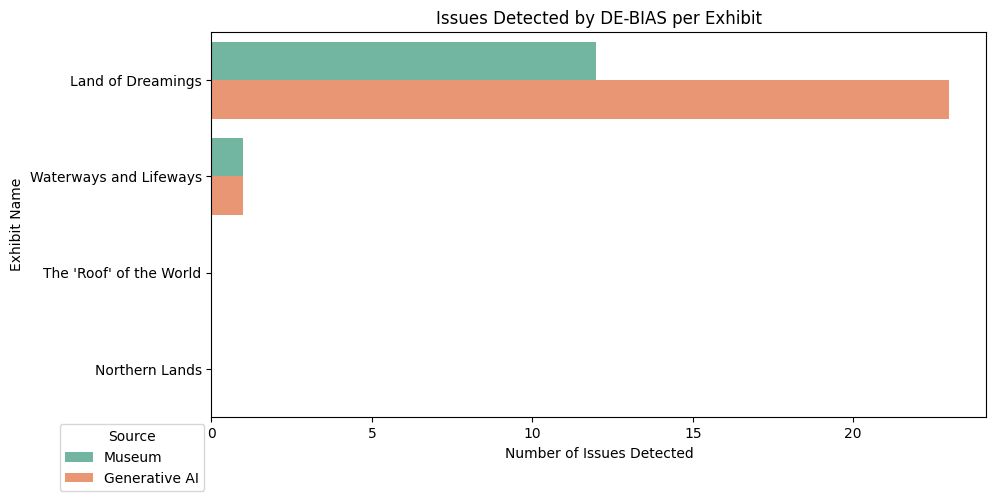

In [8]:
# Plots a bar plot for aggregated number of issues detected per exhibit
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(
    df_debias_long, # Imports the dataset
    x="Issues Detected", # Sets x axis
    y="exhibit", # Sets y axis
    hue="Source", # Sets the variable represented by color
    palette="Set2", # Sets colormap
    errorbar=None, # Removes error bar for sum aggregation
    estimator="sum", # The default aggregator for barplot is mean
    orient="y" # Sets horizontal orientation
)
# The methods customize the figure which displays the chart.
ax.set_title('Issues Detected by DE-BIAS per Exhibit')
ax.set_ylabel('Exhibit Name')
ax.set_xlabel('Number of Issues Detected')
sns.move_legend (
    ax, 
    "upper right", 
    bbox_to_anchor=(0, 0)
)

In [10]:
# Count the number of times the analysis identified a contentious term

# Sometimes Python list objects, such as the list of words returned by the DE-BIAS API, are saved to strings when saved to permanent data storage formats (CSV). When returning those data back to dataframes, the entries are read as strings instead of as lists. The following function parses those strings back to list objects for  analysis.
def to_list_safely(val):
    """
    Converts a string representation of a list into a list object.
    Handles values that are already lists or are not strings.
    """
    if pd.isna(val):
        return []  # Return an empty list for NaN values
    if isinstance(val, str):
        try:
            # ast.literal_eval is a safe way to evaluate a string
            # containing a Python literal (like a list or dict).
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            # If the string is not a valid list, treat it as a
            # single-item list containing the original string.
            return [val]
    return val if isinstance(val, list) else [val]

# Apply the list parsing function to the terms to ensure the column contains list objects
df_debias_ext['terms'] = df_debias_ext['terms'].apply(to_list_safely)

# Concatenate the list of lists of terms into a single list and then count the frequency of each term
term_counts = df_debias_ext['terms'].explode().value_counts()
print(term_counts)

terms
No issues detected    112
Aboriginal             13
Indigenous              1
Name: count, dtype: int64


In [9]:
# Count the number of times the analysis identified a contentious term

# Sometimes Python list objects, such as the list of words returned by the DE-BIAS API, are saved to strings when saved to permanent data storage formats (CSV). When returning those data back to dataframes, the entries are read as strings instead of as lists. The following function parses those strings back to list objects for  analysis.
def to_list_safely(val):
    """
    Converts a string representation of a list into a list object.
    Handles values that are already lists or are not strings.
    """
    if pd.isna(val):
        return []  # Return an empty list for NaN values
    if isinstance(val, str):
        try:
            # ast.literal_eval is a safe way to evaluate a string
            # containing a Python literal (like a list or dict).
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            # If the string is not a valid list, treat it as a
            # single-item list containing the original string.
            return [val]
    return val if isinstance(val, list) else [val]

# Apply the list parsing function to the terms to ensure the column contains list objects
df_debias_ext['genAIterms'] = df_debias_ext['genAIterms'].apply(to_list_safely)

# Concatenate the list of lists of terms into a single list and then count the frequency of each term
term_counts = df_debias_ext['genAIterms'].explode().value_counts()
print(term_counts)

genAIterms
No issues detected    102
Aboriginal             22
Traditional             1
Native                  1
Name: count, dtype: int64


# Export the results for further discussion
This workbook analyzed all of the interpretive text created both by the museum and by Generative AI. In the entire corpus, the DE-BIAS tool identified only 14 instances of potentially contentious terminology. 

The following cell filters the dataframe for only those records in which the tool identified potentially contentious terms and displays the full texts along with any possible contentious terms, the summary of the potential issue, and a citation for further exploration. 

In [14]:
# Filter the data to include records with interpretative texts for which issues were detected by the DE-BIAS tool. 
df_debias_filtered=df_debias_ext[(df_debias_ext['countTermsDetected'] > 0) | (df_debias_ext['genAIcountTermsDetected'] > 0)] # filters for object interpretation where any issues are detected in either museum-generated or Generative AI-generated text
df_debias_filtered=df_debias_filtered[[
    'museum_reference',
    'interpretation',
    'countTermsDetected',
    'terms',
    'issues',
    'sources',
    'GenAIinterpretation',
    'genAIcountTermsDetected',
    'genAIterms',
    'genAIissues',
    'genAIsources',
]]
display(df_debias_filtered)


,museum_reference,interpretation,countTermsDetected,terms,issues,sources,GenAIinterpretation,genAIcountTermsDetected,genAIterms,genAIissues,genAIsources
0,A.1911.397.243,A common method for making fire was to rub two...,0,['No issues detected'],['No issues detected'],['No issues detected'],"Firesticks such as this, with a reed sheath an...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
1,A.1898.372.39,Coolamon are wooden dishes moulded over a fire...,0,['No issues detected'],['No issues detected'],['No issues detected'],"This coolamon, an elliptical wooden vessel fro...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
2,A.1911.397.159,"Across Australia's Northern Territory, Aborigi...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...","Woven from plant fibres, this Australian Abori...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
3,K.2002.825,Crescent-shaped cane baskets were unique to th...,0,['No issues detected'],['No issues detected'],['No issues detected'],"Handwoven from cane plant, this bicornual bask...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
4,V.2008.25,Colourful coiled baskets are popular tourist i...,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...","Woven by Alison (Milyika) Carroll in 2007, thi...",2,"['Aboriginal', 'Aboriginal']",['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
5,A.1898.403,"In Aboriginal culture, the fibre cord is the m...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A...","This delicate necklace, made from pearl shell ...",1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
6,A.1898.372.65,"In the Australian desert, survival depends upo...",0,['No issues detected'],['No issues detected'],['No issues detected'],Sinews (candarra) from emu and kangaroo were e...,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
7,A.UC.105,These bowls are made from Manuka or tea tree w...,0,['No issues detected'],['No issues detected'],['No issues detected'],This 19th-century Australian Aboriginal cookin...,1,['Aboriginal'],['‘Aboriginal’ describes the original inhabita...,"['Tropen Museum et al., eds., “Words Matter: A..."
21,V.2009.125,"From his teens, Kaizawa Kōichi (born 1946) was...",1,['Indigenous'],"['Originally applied to plants and animals, in...","['Andrei Nesterov, Laura Hollink, Marieke van ...","Carefully carved by Kaizawa Kōichi in 2000, th...",0,No issues detected,No issues detected,No issues detected
35,A.1886.15,While groups of hunters travelled into the mou...,0,['No issues detected'],['No issues detected'],['No issues detected'],"Ekamasune is a traditional Ainu bag, woven fro...",1,['Traditional'],"[""The term “traditional” itself is not necessa...","['Tropen Museum et al., eds., “Words Matter: A..."


In [ ]:
# use pandas to write a CSV file
df_debias_filtered.to_csv('../exports/debias_filtered.csv', index=False)  # replace 'exports/debias_filtered.csv' with the preferred file path